##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [12]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Object Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect objects in images.

## Preparation

Let's start with installing MediaPipe.

In [1]:
!pip install -q mediapipe==0.10.0

Then download an off-the-shelf model. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/object_detector#models) for more image classification models that you can use.

In [2]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

## Visualization utilities

In [3]:
#@markdown We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image



## Download test image

Let's grab a test image that we'll use later. This image comes from [Pixabay](https://pixabay.com/photos/pet-cute-animal-domestic-mammal-3157961/).

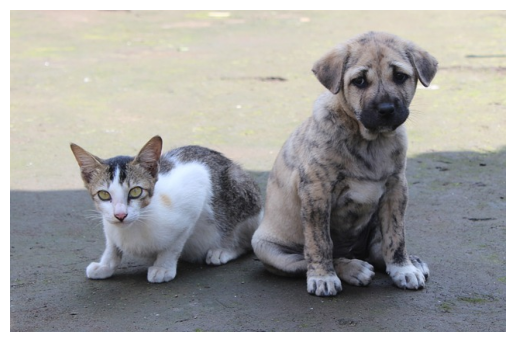

In [4]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/object_detector/cat_and_dog.jpg

IMAGE_FILE = 'image.jpg'

import cv2
from matplotlib import pyplot as plt

img = cv2.imread(IMAGE_FILE)
# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()


Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [5]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run object detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/object_detector/python) to learn more about configuration options that this solution supports.

2023-12-09 03:28:18.170887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


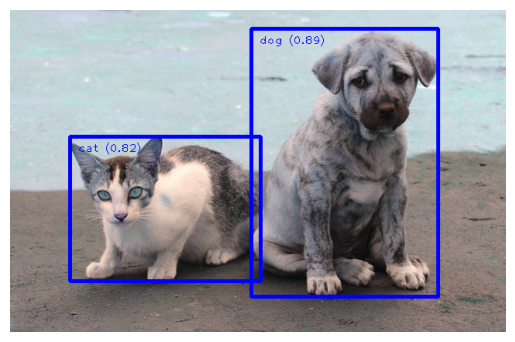

In [6]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(rgb_annotated_image)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [7]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Load the model
model_path = '/home/tarek/Desktop/50_ML_Project/Emotions_in_Images/efficientdet_lite2.tflite'
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.ObjectDetectorOptions(base_options=base_options, score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)


In [8]:
import cv2

# For webcam, use 0 (or change to 1 depending on your setup)
# For video file, replace 0 with 'path/to/your/video.mp4'
cap = cv2.VideoCapture(0)


In [9]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the BGR image to RGB and create a MediaPipe Image
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

    # Perform object detection
    detection_result = detector.detect(mp_frame)

    # Visualize the detection results
    annotated_image = visualize(frame, detection_result)

    # Display the annotated image
    cv2.imshow('Object Detection', annotated_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread (0x7f22b60).
Cannot move to target thread (0x7b8caf0)

QObject::moveToThread: Current thread (0x7b8caf0) is not the object's thread

In [ ]:
!wget https://storage.googleapis.com/mediapipe-assets/dogs2.zip --no-check-certificate

--2023-12-07 15:15:43--  https://storage.googleapis.com/mediapipe-assets/dogs2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.17.91, 172.217.19.219, 172.217.21.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.17.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58926065 (56M) [application/zip]
Saving to: ‘dogs2.zip’

dogs2.zip           100%[===================>]  56.20M  17.8MB/s    in 4.4s    

2023-12-07 15:15:48 (12.7 MB/s) - ‘dogs2.zip’ saved [58926065/58926065]

